## QSAR Model Building of Beta-Secretase 1 Inhibitors

### Read in data

In [1]:
import pandas as pd

In [9]:
# using calculated pubchem fingerprints
dataset_path = 'beta_secretase_bioactivity_data_3class_pIC50_pubchem_fp.csv'
dataset = pd.read_csv(dataset_path)
dataset


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.384050
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.698970
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.337242
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.045757
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.251812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7229,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.356547
7230,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.036212
7231,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
7232,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.966576


In [10]:
X = dataset.drop(['pIC50'], axis = 1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7229,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7230,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7231,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7232,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
Y = dataset.iloc[:,-1]
Y

0       6.384050
1       8.698970
2       6.337242
3       5.045757
4       5.251812
          ...   
7229    5.356547
7230    5.036212
7231    5.000000
7232    4.966576
7233    5.567031
Name: pIC50, Length: 7234, dtype: float64

### Remove low variance features

In [15]:
# to remove excessive, redundant features
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold = 0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices = True)]]
X = remove_low_variance(X, threshold = 0.1)
X    

,PubchemFP3,PubchemFP13,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP37,PubchemFP115,...,PubchemFP755,PubchemFP756,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP818,PubchemFP819,PubchemFP860
0,1,1,1,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,1,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7229,1,1,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7230,1,1,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7231,1,1,1,1,1,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
7232,1,0,1,1,0,0,0,1,1,0,...,0,0,1,0,1,0,1,1,0,0


In [16]:
X.to_csv('descriptor_list.csv', index = False)

### Random Forest Regression Model

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
model = RandomForestRegressor(n_estimators = 500, random_state = 42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8304362381476093

### Model Prediction

In [20]:
Y_pred = model.predict(X)
Y_pred

array([7.20207561, 7.20207561, 6.09079988, ..., 5.2011968 , 5.28940958,
       5.88575816])

### Model Performance

In [21]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.33
Coefficient of determination (R^2): 0.83


### Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [22]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

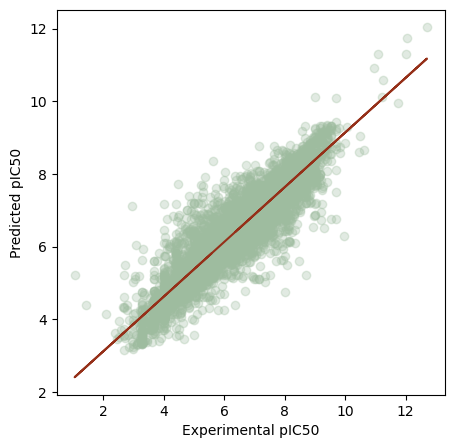

In [23]:
plt.figure(figsize = (5, 5))
plt.scatter(x = Y, y = Y_pred, c = '#9EBC9F', alpha = 0.3)

z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y, p(Y),'#953019')
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

### Save Model as Pickle Object 

In [24]:
import pickle

In [25]:
pickle.dump(model, open('beta_secretase_model.pkl', 'wb'))